In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from keras.layers import Input, BatchNormalization
import joblib
from sklearn.metrics import mean_squared_error
import json
from pickle import dump
import requests

## Traffic Threat Model Training


In [ ]:
import pandas as pd
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('/content/data - Sheet1.csv')

In [ ]:
df.columns=['ds','y','Avgspeed']

In [ ]:
df

,ds,y,Avgspeed
0,2015-01-04,7.8,59.6
1,2015-01-05,8.2,59.3
2,2015-01-06,8.3,59.1
3,2015-01-07,8.7,58.7
4,2015-01-08,8.8,58.6
...,...,...,...
85,2022-01-05,8.8,58.6
86,2022-01-06,9.1,58.3
87,2022-01-07,8.9,58.5
88,2022-01-08,9.6,57.9


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Avgspeed','y']])
df[['Avgspeed','y']]=scaler.transform(df[['Avgspeed','y']])


In [ ]:
train = df.iloc[:80]
test = df.iloc[80:]
df

,ds,y,Avgspeed
0,2015-01-04,0.457627,0.508475
1,2015-01-05,0.525424,0.457627
2,2015-01-06,0.542373,0.423729
3,2015-01-07,0.610169,0.355932
4,2015-01-08,0.627119,0.338983
...,...,...,...
85,2022-01-05,0.627119,0.338983
86,2022-01-06,0.677966,0.288136
87,2022-01-07,0.644068,0.322034
88,2022-01-08,0.762712,0.220339


In [ ]:
from prophet import Prophet
m = Prophet(interval_width=0.9)
m.add_regressor('Avgspeed',standardize=False)

m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hjo2viq/zlcvsw4r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3hjo2viq/zjz37eps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2423', 'data', 'file=/tmp/tmp3hjo2viq/zlcvsw4r.json', 'init=/tmp/tmp3hjo2viq/zjz37eps.json', 'output', 'file=/tmp/tmp3hjo2viq/prophet_model9u9s5dby/prophet_model-20230203153414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:34:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(df)
preds_1=forecast['yhat']

In [ ]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Avgspeed,Avgspeed_lower,Avgspeed_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
60,2020-01-04,0.167500,0.063448,0.103793,0.167500,0.167500,-0.888089,-0.888089,-0.888089,-0.083508,...,-0.005256,-0.005256,-0.005256,0.809837,0.809837,0.809837,0.0,0.0,0.0,0.083992
61,2020-01-05,0.167478,-0.048101,-0.012070,0.167478,0.167478,-1.007640,-1.007640,-1.007640,-0.198233,...,-0.001733,-0.001733,-0.001733,0.811141,0.811141,0.811141,0.0,0.0,0.0,-0.030755
62,2020-01-06,0.167455,0.006635,0.046859,0.167455,0.167455,-0.956404,-0.956404,-0.956404,-0.140880,...,0.004654,0.004654,0.004654,0.810871,0.810871,0.810871,0.0,0.0,0.0,0.026575
63,2020-01-07,0.167432,0.187735,0.226797,0.167432,0.167432,-0.768539,-0.768539,-0.768539,0.041125,...,0.000370,0.000370,0.000370,0.809294,0.809294,0.809294,0.0,0.0,0.0,0.208557
64,2020-01-08,0.167409,0.356372,0.395189,0.167409,0.167409,-0.597753,-0.597753,-0.597753,0.207937,...,-0.001215,-0.001215,-0.001215,0.806905,0.806905,0.806905,0.0,0.0,0.0,0.375346
65,2020-01-09,0.167387,0.339219,0.377542,0.167387,0.167387,-0.614831,-0.614831,-0.614831,0.190983,...,0.001464,0.001464,0.001464,0.804350,0.804350,0.804350,0.0,0.0,0.0,0.358370
66,2020-01-10,0.167364,0.369938,0.409621,0.167364,0.167364,-0.580674,-0.580674,-0.580674,0.223398,...,0.001717,0.001717,0.001717,0.802354,0.802354,0.802354,0.0,0.0,0.0,0.390761
67,2020-01-11,0.167341,0.347900,0.384783,0.167341,0.167341,-0.597753,-0.597753,-0.597753,0.198628,...,-0.005256,-0.005256,-0.005256,0.801636,0.801636,0.801636,0.0,0.0,0.0,0.365969
68,2020-01-12,0.167318,0.402828,0.443939,0.167318,0.167318,-0.546517,-0.546517,-0.546517,0.254579,...,-0.001733,-0.001733,-0.001733,0.802829,0.802829,0.802829,0.0,0.0,0.0,0.421898
69,2021-01-01,0.159248,0.260288,0.299516,0.159248,0.159248,-0.683146,-0.683146,-0.683146,0.120381,...,0.001717,0.001717,0.001717,0.801809,0.801809,0.801809,0.0,0.0,0.0,0.279628


In [ ]:
# Python
from prophet.serialize import model_to_json, model_from_json
with open('Traffic_prophet_1.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model




In [ ]:
with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

## Weather model Training

In [ ]:
pf=pd.read_csv('/content/Bengaluru past30days.csv')

In [ ]:
pf

,datetime,humidity,precip,windspeed,rainfall_intensity
0,2022-12-31T00:00:00,85.45,0.0,9.4,9.400000
1,2022-12-31T01:00:00,88.10,0.0,9.4,9.400000
2,2022-12-31T02:00:00,82.67,0.0,0.1,0.100000
3,2022-12-31T03:00:00,96.94,0.0,5.4,5.400000
4,2022-12-31T04:00:00,96.82,0.0,4.5,4.500000
...,...,...,...,...,...
739,2023-01-30T19:00:00,73.45,0.0,13.0,13.000000
740,2023-01-30T20:00:00,73.73,1.8,11.3,18.151896
741,2023-01-30T21:00:00,78.35,1.4,16.6,23.066483
742,2023-01-30T22:00:00,83.45,1.0,16.6,22.642260


In [ ]:
train=pf.iloc[:735]
test=pf.iloc[735:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_weather = MinMaxScaler()
scaler_weather.fit(pf['rainfall_intensity'].values.reshape(-1,1))
dump(scaler_weather, open('scaler_weather.pkl', 'wb'))



In [ ]:
train.drop('datetime',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train

,humidity,precip,windspeed,rainfall_intensity
0,85.45,0.0,9.4,9.400000
1,88.10,0.0,9.4,9.400000
2,82.67,0.0,0.1,0.100000
3,96.94,0.0,5.4,5.400000
4,96.82,0.0,4.5,4.500000
...,...,...,...,...
730,69.42,0.0,13.0,13.000000
731,65.25,0.0,16.6,16.600000
732,61.27,0.0,7.7,7.700000
733,54.42,0.1,9.4,9.619394


In [ ]:
X=pf[['humidity','precip','windspeed']]
y=pf['rainfall_intensity']

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(f'RMSE : {rmse}')


RMSE : 0.6638293202025006


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(preds), max(y_test))
p2 = min(min(preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
joblib.dump(model, "./weather.joblib")

['./weather.joblib']

In [ ]:
preds_2=model.predict(X_train)[:90]

## Combined Threat Model 

In [31]:
input_1= keras.Input(shape=(1,),name='Traffic_input')
input_2= keras.Input(shape=(1,),name='Weather_input')


#autoencoder 


z=keras.layers.Concatenate()([input_1,input_2])
z=layers.Dense(4, activation="relu")(z)
z=layers.Dense(2, activation="relu")(z)
score=layers.Dense(1, activation="relu",name="Score")(z)


x=layers.Dense(4,activation ="relu")(score)
x=layers.Dense(2,activation ="relu")(x)
outputs_1=layers.Dense(1,activation ="relu")(x)
x=layers.Dense(4,activation ="relu")(score)
x=layers.Dense(2,activation ="relu")(x)
outputs_2=layers.Dense(1,activation ="relu")(x)

autoencoder = keras.Model([input_1,input_2], [outputs_1,outputs_2], name="autoencoder")
autoencoder.summary()









Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Traffic_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Weather_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 2)            0           ['Traffic_input[0][0]',          
                                                                  'Weather_input[0][0]']          
                                                                                                  
 dense (Dense)                  (None, 4)            12          ['concatenate[0][0]']  

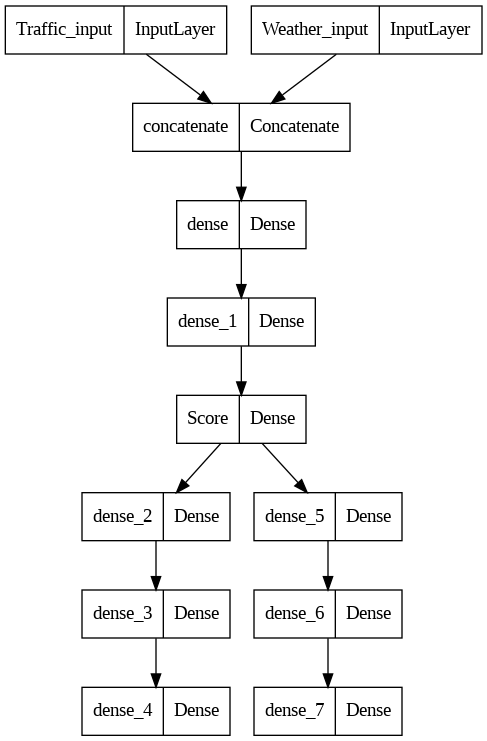

In [32]:
tf.keras.utils.plot_model(autoencoder)

In [ ]:
for layer in autoencoder.layers: print(layer.get_config(), layer.get_weights())

{'batch_input_shape': (None, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'Traffic_input'} []
{'batch_input_shape': (None, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'Weather_input'} []
{'name': 'concatenate_4', 'trainable': True, 'dtype': 'float32', 'axis': -1} []
{'name': 'dense_32', 'trainable': True, 'dtype': 'float32', 'units': 4, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.95873785,  0.247545  ,  0.42579055,  0.56651926],
       [-0.44186616, -0.6981027 ,  0.13160801,  0.02964377]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
{'name': 'dense_33', 'trainable': True, 'dtype': 'float32', 'units': 4, 'activation': 'relu', 'use_bias': True, 'ker

In [ ]:
preds_2_scaled=scaler_weather.transform(preds_2.reshape(-1,1))

In [ ]:
preds_2=scaler_weather.transform(preds_2)

In [ ]:
len(preds_2)

75

In [ ]:
score_model=keras.Model([input_1,input_2],score)
score_model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(),
    
)


In [ ]:
values=score_model.predict([preds_1,preds_2_scaled])

3/3 [==============================] - 0s 3ms/step


In [ ]:
score_model.save("score_model.h5")    ## Combined Threat

In [ ]:
autoencoder.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(),
    
)

history = autoencoder.fit([preds_1,preds_2_scaled],[preds_1,preds_2_scaled] , batch_size=64, epochs=64, validation_split=0.1)


Epoch 1/64
2/2 [==============================] - 3s 238ms/step - loss: 0.1281 - dense_4_loss: 0.1275 - dense_7_loss: 5.0445e-04 - val_loss: 0.1307 - val_dense_4_loss: 0.1304 - val_dense_7_loss: 2.8198e-04
Epoch 2/64
2/2 [==============================] - 0s 25ms/step - loss: 0.1173 - dense_4_loss: 0.1169 - dense_7_loss: 3.3352e-04 - val_loss: 0.1193 - val_dense_4_loss: 0.1191 - val_dense_7_loss: 1.3384e-04
Epoch 3/64
2/2 [==============================] - 0s 30ms/step - loss: 0.1070 - dense_4_loss: 0.1068 - dense_7_loss: 2.2141e-04 - val_loss: 0.1083 - val_dense_4_loss: 0.1083 - val_dense_7_loss: 4.5626e-05
Epoch 4/64
2/2 [==============================] - 0s 24ms/step - loss: 0.0972 - dense_4_loss: 0.0971 - dense_7_loss: 1.6397e-04 - val_loss: 0.0979 - val_dense_4_loss: 0.0979 - val_dense_7_loss: 7.5367e-06
Epoch 5/64
2/2 [==============================] - 0s 25ms/step - loss: 0.0877 - dense_4_loss: 0.0876 - dense_7_loss: 1.3526e-04 - val_loss: 0.0879 - val_dense_4_loss: 0.0879 - val

In [ ]:
autoencoder.save("autoencoder.h5")